In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# Aufgabe 1 Numerische Stabilität
Betrachten Sie die Funktionen  
(a) $f(x)=(x^3+1/3)-(x^3-1/3)$ und  
(b) $g(x)=((3+x^3/3)-(3-x^3/3))/x^3$.  
Bestimmen Sie empirisch, für welche Bereiche von $x$ (grob) das numerische Ergebnis  
• vom algebraischen um nicht mehr als $1\%$ abweicht,  
• gleich Null ist.  
(c) Stellen Sie das Ergebnis in geeigneter Form graphisch dar (d. h. z. B. logarithmische $x$-Skala)!  
`x = np.logspace(start, stop, num)`  
(d) Wie ändert sich die Darstellung, wenn Sie die Datenpunkt mit dem Datentyp float32 bzw. float64  
erstellen?  
`x_32 = np.logspace(start, stop, num, dtype='float32')`  
`x_64 = np.logspace(start, stop, num, dtype='float64')`

In [2]:
f = lambda x: (x**3+1/3)-(x**3-1/3)
g = lambda x: ((3+x**3/3)-(3-x**3/3))/x**3
exact = 2/3

analytisches Ergebnis:  
$f(x)=g(x)=2/3$
## a)

In [3]:
x_size = 10000
x_a,f_x,rel_err_f = {},{},{}
x_a['default'] = np.logspace(4,6,x_size)
x_a['32'] = np.logspace(1,3,x_size,dtype='float32')
x_a['64'] = np.logspace(4,6,10000,dtype='float64')
for key in x_a: f_x[key] = f(x_a[key])
for key in x_a: rel_err_f[key] = np.abs(exact - f_x[key])/exact

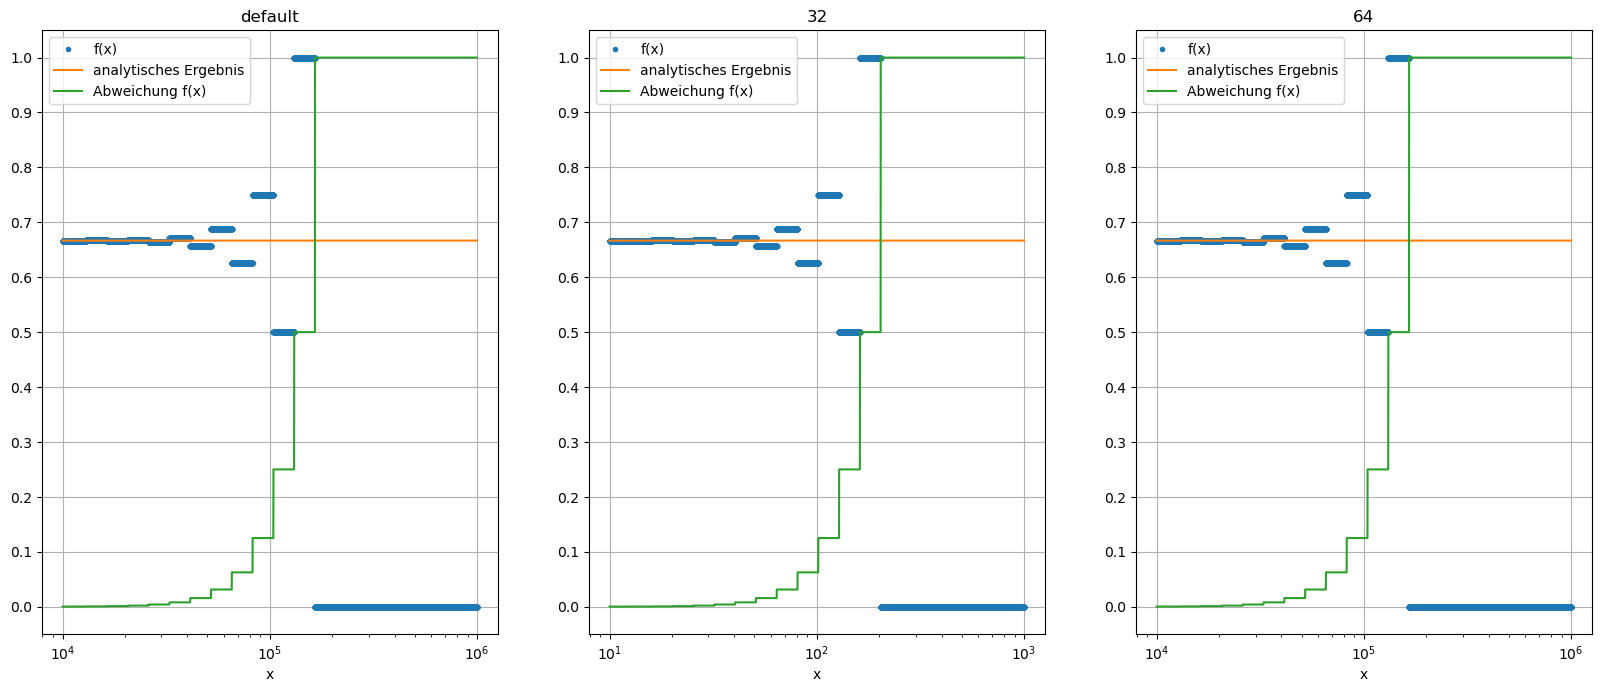

In [4]:
plt.subplots(1,3,figsize=(20,8),dpi=100)

i=1
for key in x_a:
    plt.subplot(1,3,i)
    plt.xscale('log')
    plt.yticks(np.arange(0.0,1.1,0.1,))
    plt.xlabel('x')
    plt.title(key)

    plt.plot(x_a[key], f_x[key],'.',label='f(x)')
    plt.plot(x_a[key], np.full_like(x_a[key],exact),'-',label='analytisches Ergebnis')
    plt.plot(x_a[key], rel_err_f[key],'-',label='Abweichung f(x)')

    plt.grid(which='major')
    plt.legend()
    i += 1

In [5]:
for key in x_a:
    print(f'Präzision: {key}')
    print(f'  Letztes x für Abweichung von f(x) < 1% : x={x_a[key][rel_err_f[key]<0.01][-1]:.2f}')
    print(f'  Erstes x für f(x)=0 : x={x_a[key][f_x[key]==0][0]:.2f}')

Präzision: default
  Letztes x für Abweichung von f(x) < 1% : x=41272.58
  Erstes x für f(x)=0 : x=165166.43
Präzision: 32
  Letztes x für Abweichung von f(x) < 1% : x=50.78
  Erstes x für f(x)=0 : x=203.20
Präzision: 64
  Letztes x für Abweichung von f(x) < 1% : x=41272.58
  Erstes x für f(x)=0 : x=165166.43


## a) Ergebnis:
Für $x<0$ verhält es sich genau gleich, da das Negative vorzeichen nur zum Unterschied im ersten Bit führt.

| Präzision       | Bereich für Abweichung < 1% | Bereich für $f(x)=0$   |
| :-------------: | :-------------------------: | :--------------------: |
| Python Standard | $|x| < 4 \cdot 10^4$        | $|x| > 1.7 \cdot 10^5$ |
| float32         | $|x| < 5 \cdot 10^1$        | $|x| > 2 \cdot 10^2$   |
| float64         | $|x| < 4 \cdot 10^4$        | $|x| > 1.7 \cdot 10^5$ |

Also arbeitet Python standardmäßig mit float64.

## b)

In [6]:
x_size = 10000
x_b,g_x,rel_err_g = {},{},{}
x_b['default'] = np.logspace(-6,-4,x_size)
x_b['float32'] = np.logspace(-3,-1,x_size,dtype='float32')
x_b['float64'] = np.logspace(-6,-4,x_size,dtype='float64')
for key in x_b: 
    g_x[key] = g(x_b[key])
    rel_err_g[key] = np.abs(exact - g_x[key])/exact

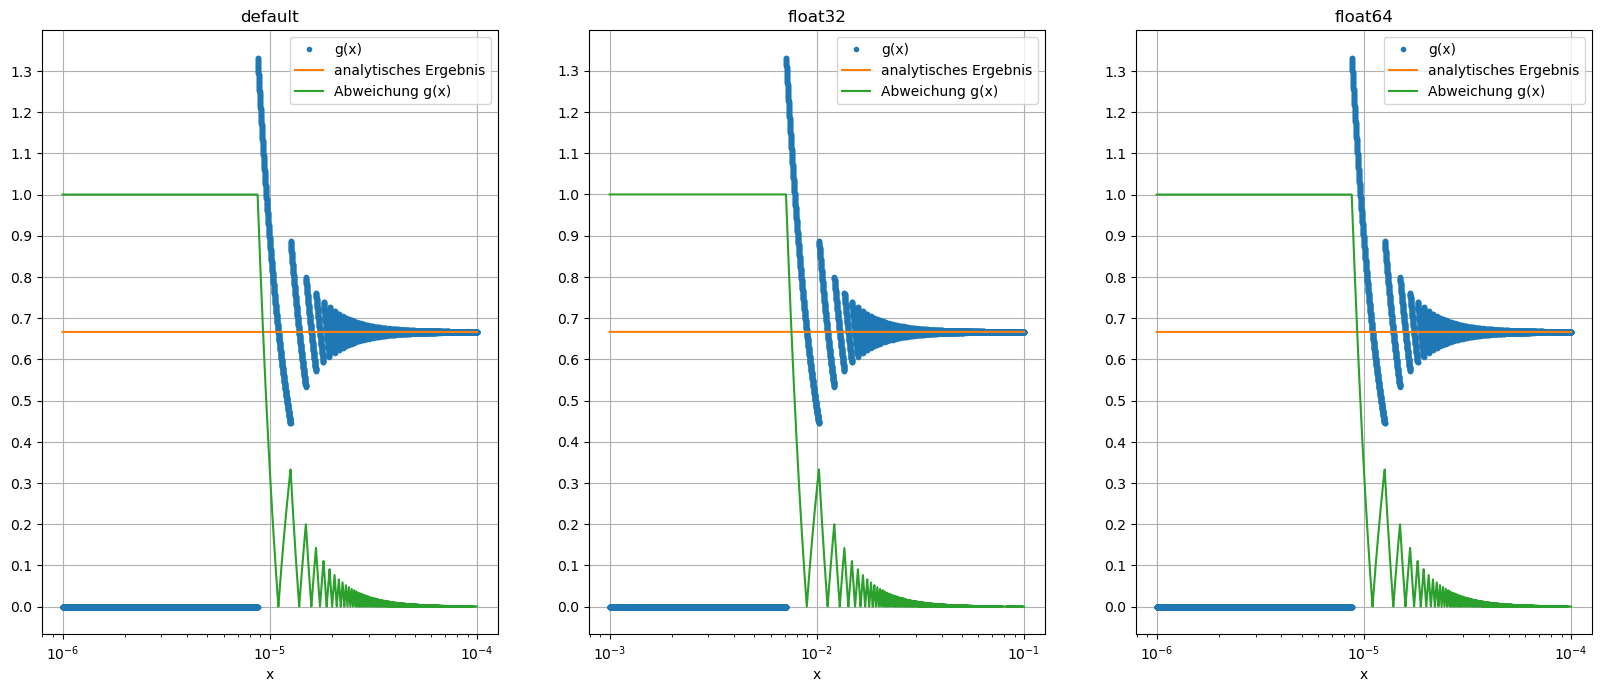

In [7]:
plt.subplots(1,3,figsize=(20,8),dpi=100)

i=1
for key in x_b:
    plt.subplot(1,3,i)
    plt.xscale('log')
    plt.yticks(np.arange(0.0,1.5,0.1,))
    plt.xlabel('x')
    plt.title(key)

    plt.plot(x_b[key],g_x[key],'.',label='g(x)')
    plt.plot(x_b[key],np.full_like(x_b[key],exact),'-',label='analytisches Ergebnis')
    plt.plot(x_b[key],rel_err_g[key],'-',label='Abweichung g(x)')

    plt.grid(which='major')
    plt.legend();
    i+=1

In [8]:
for key in x_b:
    print(f'Präzision: {key}')
    print(f'  Erstes x für Abweichung von g(x) < 1% : x={x_b[key][rel_err_g[key]<0.01][0]:.2e}')
    print(f'  Letztes x für f(x)=0 : x={x_b[key][g_x[key]==0][-1]:.2e}')

Präzision: default
  Erstes x für Abweichung von g(x) < 1% : x=1.10e-05
  Letztes x für f(x)=0 : x=8.73e-06
Präzision: float32
  Erstes x für Abweichung von g(x) < 1% : x=8.91e-03
  Letztes x für f(x)=0 : x=7.10e-03
Präzision: float64
  Erstes x für Abweichung von g(x) < 1% : x=1.10e-05
  Letztes x für f(x)=0 : x=8.73e-06


## b) Ergebnis
Für $x<0$ verhält es sich genau gleich, da das Negative vorzeichen nur zum Unterschied im ersten Bit führt.

| Präzision | Bereich für Abweichung < 1% | Bereich für $g(x)=0$ |
| :---: | :---: | :---: |
| Python Standard | $x > 1 \cdot 10^{-5}$ | $x < 9 \cdot 10^{-6}$ |
| float32 | $x > 9 \cdot 10^{-3}$ | $x < 7 \cdot 10^{-3}$ |
| float64 | $x > 1 \cdot 10^{-5}$ | $x < 9 \cdot 10^{-6}$ |

---
  
# Aufgabe 2 Numerische Stabilität und Kondition
Der Ausdruck $𝑓(𝐸, 𝛩)$ stellt einen Summanden des differentiellen Wirkungsquerschnitts für die Reaktion $e^−e^+ → 𝛾𝛾$ dar und ist gegeben durch  
$𝑓(𝐸, 𝛩) = \frac{2 + sin^2𝛩}{1 − 𝛽^2 cos^2𝛩}$.  
mit  
$𝛽 = \sqrt{1 − 𝛾^{−2}}$,  
$𝛾 = \frac{E}{M} \, \, (m = 511 keV)$.  

(a) Ist diese Gleichung für $𝑓(𝐸, 𝛩)$ numerisch stabil? In welchem Bereich von $𝛩$ ist die Gleichung für $𝐸 = 50 GeV$ numerisch instabil?  
(b) Beheben Sie die Stabilitätsprobleme durch eine geeignete analytische Umformung.  
(Hinweis: Nutzen Sie $1 − 𝛽^2 = 1/𝛾^2$ und $1 = sin^2𝛩 + cos^2𝛩$)  
(c) Zeigen Sie, dass Sie die Stabilitätsprobleme behoben haben, indem Sie beide Gleichungen im kritischen Intervall darstellen.  
(d) Berechnen Sie die Konditionszahl. Wie hängt diese von $𝛩$ ab?  
(e) Stellen Sie den Verlauf der Konditionszahl als Funktion von $𝛩$ ($0 ≤ 𝛩 ≤ 𝜋$) grafisch dar.  
In welchem Bereich ist das Problem gut bzw. schlecht konditioniert?  
(f) Was ist der Unterschied zwischen Stabilität und Kondition?

## a)
$E = 50 \text{ GeV} \Rightarrow \beta \approx 1$  
$\Rightarrow 1-\beta^2 \cos^2 \theta \approx 0$ für $\cos^2\theta \approx 1$  
Also ist diese Gleichung für $\cos^2 \theta \approx 1$ numerisch instabil.  

## b)

\begin{align}
    f(\theta) &= \frac{2+\sin^2\theta}{1-\beta^2 \cos^2 \theta} &\text{mit  } \sin^2\theta + \cos^2\theta &= 1 \\
    &= \frac{2+\sin^2\theta}{1-\beta^2 + \beta^2 \sin^2\theta} \\
    &= \frac{ \left( \frac{2}{\sin^2\theta} \right) + 1 }{ \left( \frac{1-\beta^2}{\sin^2\theta} \right) + \beta^2 }
    &\text{mit  } 1-\beta^2&=\frac{1}{\gamma^2} \\
    &= \frac{ \left( \frac{2}{\sin^2\theta} \right) + 1 }{ \frac{1}{\gamma^2}\left( \frac{1}{\sin^2\theta} - 1 \right)+1} =: g(\theta)
\end{align}

## c)
Im Folgenden wird die relative Abweichung der Funktionen $f(\theta)$ und $g(\theta)$ geplotted,  
indem als exakter Wert `float64` und als numerischer Wert `float32` angenommen wird.  
Es werden für $\gamma$ und $\beta$ die Werte 
\begin{align}
    E &= 50 \text{ GeV} \\
    m &= 511 \text{ keV}
\end{align}
verwendet.  
Es wird in einem Bereich $\theta \in [\pi - \text{d}\theta , \pi]$ geplottet.  
Mit $\text{d}\theta = 10^{-3}$

In [9]:
E = 50*10**9 #eV
m = 511*10**3 #eV
gamma = E/m
beta = np.sqrt(1-gamma**(-2))

f = lambda beta,theta: (2+np.sin(theta)**2)/(1-beta**2*np.cos(theta)**2)
g = lambda gamma,theta: ( 2/np.sin(theta)**2 +1 )/(1/gamma**2 * (1/np.sin(theta)**2 - 1) + 1)

pi = np.pi
theta_size = 100000
dtheta = 10**-3
theta_min = pi-dtheta
thata_max = pi
theta_64 = np.linspace(theta_min,thata_max,theta_size,dtype='float64')
theta_32 = np.linspace(theta_min,thata_max,theta_size,dtype='float32')

f_theta_64 = f(beta,theta_64)
f_theta_32 = f(beta,theta_32)
g_theta_64 = g(gamma,theta_64)
g_theta_32 = g(gamma,theta_32)

<ipython-input-9-f0f11ab2dada>:6: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda beta,theta: (2+np.sin(theta)**2)/(1-beta**2*np.cos(theta)**2)


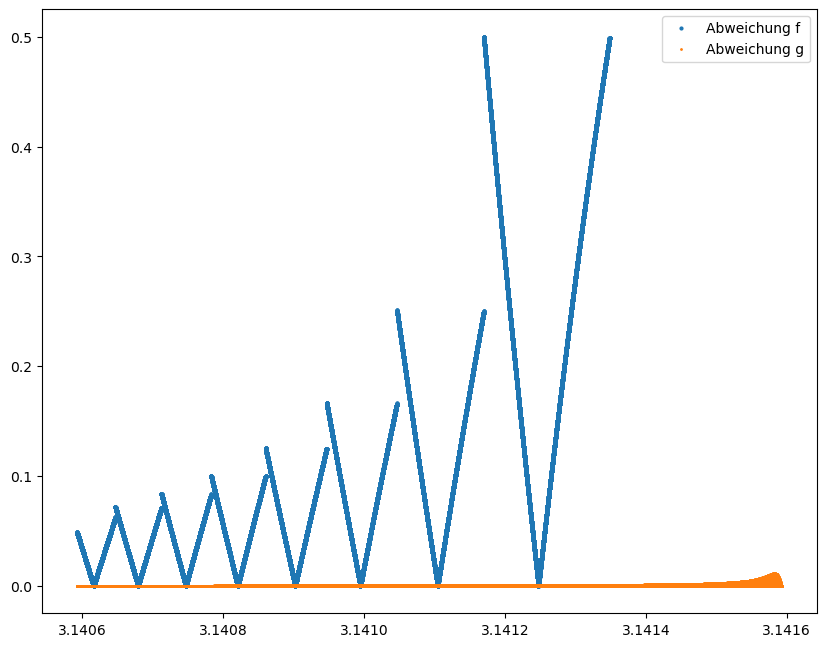

In [10]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(theta_64,np.abs(f_theta_64-f_theta_32)/f_theta_64,'.',markersize=4,label='Abweichung f')
plt.plot(theta_64,np.abs(g_theta_64-g_theta_32)/g_theta_64,'.',markersize=2,label='Abweichung g')
plt.legend();

### Was sieht man am Plot?
In der Nähe von $\theta=\pi$ werden die Abweichungen von f nicht mehr angezeigt, weil dort ein "divide by zero" Error kommt.  
g kann so nahe an $\pi$ geplottet werden wie man will und es kommt kein Error.  
Außerdem ist die Abweichung von g deutlich geringer als die Abweichung von f.
Also scheint $g(\theta)$ die deutlich stabilere Funktion zu sein.

## d)
Konditionszahl von $f(\theta)$:  
\begin{align}
f(\theta) &= \frac{2+\sin^2\theta}{1-\beta^2 \cos^2 \theta} \\
f'(\theta) &= -\frac{2 \sin\theta \cos\theta (3 \beta^2 - 1)}{(1 - \beta^2 \cos^2\theta)^2} \\
K = \left| \theta \frac{f'(\theta)}{f(\theta)} \right| &= \left| -\frac{2 \theta \sin\theta \cos\theta (3 \beta^2 -1)}{(1 - \beta^2 \cos^2\theta) (2 + \sin^2\theta)} \right|
\end{align}

## e)



In [11]:
K = lambda beta,theta: np.abs( (2*theta*np.sin(theta)*np.cos(theta)*(3*beta**2-1)) / ((1-beta**2*np.cos(theta)**2)*(2+np.sin(theta)**2))) 

E = 50*10**9 #eV
m = 511*10**3 #eV
gamma = E/m
beta = np.sqrt(1-gamma**(-2))

theta_size = 100
theta = np.linspace(0,pi,theta_size)

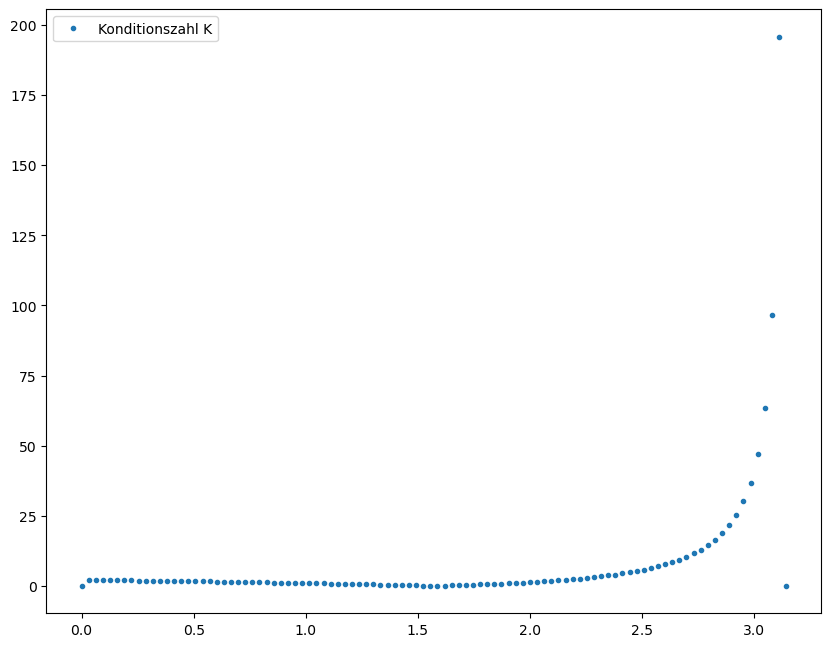

In [12]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(theta,K(beta,theta),'.',label='Konditionszahl K')
plt.legend();

Das Problem scheint um $\pi$ deutlich schlechter konditioniert zu sein als um 0.

## f)
- Stabilität: Abweichung der numerischen von der algebraischen Lösung durch Rundungsfehler.
- Kondition:  Abweichung des Ergebnisses bei einem Fehler der Eingangsdaten ($x \rightarrow x+\Delta x$) ohne Rundungsfehler